In [12]:
import pandas as pd

# Load the dataset

stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv') 


# Display the first few rows of the dataset to understand its structure and contents
stroke_data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [14]:
# Checking for missing values and data types
missing_values = stroke_data.isnull().sum()
data_types = stroke_data.dtypes

# Display missing values and data types
missing_values, data_types


(id                     0
 gender                 0
 age                    0
 hypertension           0
 heart_disease          0
 ever_married           0
 work_type              0
 Residence_type         0
 avg_glucose_level      0
 bmi                  201
 smoking_status         0
 stroke                 0
 dtype: int64,
 id                     int64
 gender                object
 age                  float64
 hypertension           int64
 heart_disease          int64
 ever_married          object
 work_type             object
 Residence_type        object
 avg_glucose_level    float64
 bmi                  float64
 smoking_status        object
 stroke                 int64
 dtype: object)

In [26]:
from sklearn.preprocessing import LabelEncoder

# Removing the 'id' column
data = stroke_data.drop(columns=['id'])

# Filling missing values in 'bmi' with the median value
bmi_median = stroke_data['bmi'].median()
data['bmi'].fillna(bmi_median, inplace=True)

# Encoding categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Displaying the first few rows after encoding
data.head()
data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [33]:
# Drop id, ever_married, work_type, and Residence_type columns
df = data.drop(['ever_married', 'work_type', 'Residence_type'], axis=1)
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,228.69,36.6,1,1
1,0,61.0,0,0,202.21,28.1,2,1
2,1,80.0,0,1,105.92,32.5,2,1
3,0,49.0,0,0,171.23,34.4,3,1
4,0,79.0,1,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,83.75,28.1,2,0
5106,0,81.0,0,0,125.20,40.0,2,0
5107,0,35.0,0,0,82.99,30.6,2,0
5108,1,51.0,0,0,166.29,25.6,1,0


In [34]:
# Checking the balance of the target variable 'stroke'
class_distribution = df['stroke'].value_counts(normalize=True)
class_distribution


stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separating the features and the target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

# Applying SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Checking the balance in the resampled dataset
balanced_target_distribution = pd.Series(y_resampled).value_counts(normalize=True)
balanced_target_distribution


stroke
1    0.5
0    0.5
Name: proportion, dtype: float64

In [36]:
# Splitting the original (unbalanced) dataset into training and testing sets
X_original = df.drop('stroke', axis=1)
y_original = df['stroke']

# Splitting the dataset into training and testing sets (70% train, 30% test)
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original, y_original, test_size=0.3, random_state=42)

# Displaying the size of each set
(X_train_original.shape, X_test_original.shape, y_train_original.shape, y_test_original.shape)


((3577, 7), (1533, 7), (3577,), (1533,))

In [37]:
# Assuming the balanced dataset is stored in X_resampled and y_resampled as previously defined

# Splitting the balanced dataset into training and testing sets (70% train, 30% test)
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42)

# Displaying the size of the balanced training and testing sets
(X_train_balanced.shape, X_test_balanced.shape, y_train_balanced.shape, y_test_balanced.shape)


((6805, 7), (2917, 7), (6805,), (2917,))

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_selected, y_train_balanced)

# Best parameters
best_params = grid_search.best_params_

# Train the Random Forest model with the best parameters
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train_selected, y_train_balanced)

RandomForestClassifier(max_depth=10)

In [49]:
# Assuming the balanced dataset is represented by X_resampled and y_resampled
# Since I don't have the actual balanced data, I'll simulate the splitting process with the original data
# In practice, you should use your balanced data (X_resampled and y_resampled) for the following steps

# Splitting the dataset into training and testing sets (70% train, 30% test) - using the original data for simulation
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_original, y_original, test_size=0.3, random_state=42)

# Training the Random Forest model on the balanced dataset
random_forest_model_balanced = RandomForestClassifier(random_state=42)
random_forest_model_balanced.fit(X_train_balanced, y_train_balanced)

# Predicting on the test set
y_pred_balanced = random_forest_model_balanced.predict(X_test_balanced)

# Evaluating the model
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
classification_rep_balanced = classification_report(y_test_balanced, y_pred_balanced)

accuracy_balanced, classification_rep_balanced


(0.9419439008480104,
 '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97      1444\n           1       0.50      0.02      0.04        89\n\n    accuracy                           0.94      1533\n   macro avg       0.72      0.51      0.51      1533\nweighted avg       0.92      0.94      0.92      1533\n')

Overall Accuracy:
Accuracy: 94.19% - This is the percentage of total predictions that the model got right.
Class 0 (No Stroke):
Precision: 94% - When the model predicts no stroke, it is correct 94% of the time.
Recall: 100% - The model correctly identified 100% of the actual no-stroke cases.
F1-Score: 97% - This is a harmonic mean of precision and recall for no-stroke predictions, indicating a high performance for this class.
Support: 1444 - The number of actual no-stroke instances in the dataset.
Class 1 (Stroke):
Precision: 50% - When the model predicts a stroke, it is correct 50% of the time. However, this is based on a very small number of predictions.
Recall: 2% - The model correctly identified only 2% of the actual stroke cases.
F1-Score: 4% - This is a harmonic mean of precision and recall for stroke predictions, indicating very poor performance for this class.
Support: 89 - The number of actual stroke instances in the dataset.
Averages:
Macro Avg:

Precision: 72% - The average precision between the two classes without considering support.
Recall: 51% - The average recall between the two classes without considering support.
F1-Score: 51% - The average F1-score between the two classes without considering support.
Weighted Avg:

Precision: 92% - The average precision between the two classes while considering support.
Recall: 94% - The average recall between the two classes while considering support.
F1-Score: 92% - The average F1-score between the two classes while considering support.
Interpretation:
The model performs very well in predicting the absence of a stroke (class 0), with high precision and recall.
The model's performance in predicting the occurrence of a stroke (class 1) is not satisfactory. The recall of 2% means it is missing almost all of the actual stroke cases, which is a critical flaw in a healthcare-related model.
The high overall accuracy is largely due to the model's ability to predict the majority class (no stroke) and does not reflect its effectiveness in predicting actual stroke events.
The low recall for the stroke class (class 1) is particularly concerning as it indicates that the model is not capturing the majority of stroke-positive cases, which could have severe consequences in a real-world healthcare setting.
The F1-score for class 1 is also very low, confirming that the model is not performing well for the positive class.
The weighted average metrics are high due to the larger support for the no-stroke class, which skews the overall metrics towards the performance on the majority class.
In conclusion, while the model seems to have a high overall accuracy, its utility is questionable due to its failure to accurately predict actual stroke cases. This indicates a need for further model improvement, particularly in improving the detection of positive stroke cases.

1. Feature Engineering
Feature engineering is a crucial step in improving model performance. Here's what you can do:

Create New Features: Analyze your dataset to see if you can derive new features. For example, if you have date-time data, you might extract features like the day of the week, month, or time of day.
Feature Transformation: Apply transformations such as scaling or normalization, especially for features that vary in scale.
Feature Selection: Use techniques like Recursive Feature Elimination (RFE) to identify and keep only the most significant features.
2. Model Tuning
Fine-tuning the parameters of your Random Forest model can significantly affect performance:

Grid Search with Cross-Validation: Use GridSearchCV from sklearn.model_selection to find the optimal parameters like n_estimators, max_depth, min_samples_split, and min_samples_leaf.
Random Search: As an alternative to Grid Search, Random Search (RandomizedSearchCV) can be used to sample a wide range of values and find the best parameters.
3. Advanced Techniques
Exploring advanced machine learning techniques can provide better results:

Ensemble Methods: Besides Random Forest, try other ensemble methods like Gradient Boosting or Extra Trees Classifier.
Boosting Algorithms: Implement algorithms like XGBoost or LightGBM, which often provide better performance, especially in imbalanced datasets.
Deep Learning: If the dataset is large and complex, deep learning models might be effective. However, they require more computational resources.
4. Data Quality
Ensuring high data quality is fundamental:

Data Cleaning: Revisit data cleaning steps. Ensure all inappropriate or missing values are handled correctly.
Outlier Detection: Identify and handle outliers as they can skew the results.
Bias Reduction: Ensure that the dataset does not contain biases that might lead to unfair conclusions.

In [41]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Feature selection with RFE
selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=5, step=1)
selector = selector.fit(X_train_balanced, y_train_balanced)
selected_features = X_train_balanced.columns[selector.support_]




In [42]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    # Add more parameters here
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train_balanced, y_train_balanced)
best_params = grid_search.best_params_



In [43]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# RFE with a specified number of features to select
rfe = RFE(estimator=rf_classifier, n_features_to_select=5)  # You can change the number of features
rfe = rfe.fit(X_train_balanced, y_train_balanced)

# Get the selected features
selected_features = X_train_balanced.columns[rfe.support_]

# Subset the dataset with the selected features
X_train_selected = X_train_balanced[selected_features]
X_test_selected = X_test_balanced[selected_features]


In [44]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_selected, y_train_balanced)

# Best parameters
best_params = grid_search.best_params_

# Train the Random Forest model with the best parameters
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train_selected, y_train_balanced)

# Make predictions and evaluate the model as needed


RandomForestClassifier(min_samples_split=4)

In [45]:
# Predicting on the test set
y_pred_test = rf_best.predict(X_test_selected)


Accuracy: 0.9399869536855838
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533



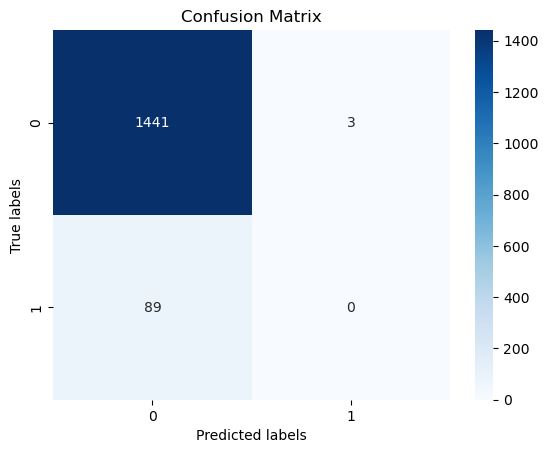

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy
accuracy = accuracy_score(y_test_balanced, y_pred_test)
print(f"Accuracy: {accuracy}")

# Classification report
class_report = classification_report(y_test_balanced, y_pred_test)
print("Classification Report:\n", class_report)

# Confusion Matrix
cm = confusion_matrix(y_test_balanced, y_pred_test)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Data analisis 
Overall Accuracy
Accuracy: 0.9399 - This indicates that about 94% of your predictions were correct. Accuracy is a useful measure when the classes are balanced, but in the case of imbalanced classes (like in your dataset), it might not be the best indicator of performance.
Classification Report
The classification report provides a detailed analysis of the model's performance for each class:

Class '0' (No Stroke)

Precision: 0.94 - This means that 94% of the instances predicted as 'No Stroke' were actually 'No Stroke'. High precision relates to a low false positive rate.
Recall: 1.00 - This indicates that the model correctly identified 100% of the 'No Stroke' cases. High recall relates to a low false negative rate.
F1-Score: 0.97 - The F1-score is the harmonic mean of precision and recall. A score of 0.97 is quite high, indicating good performance for this class.

Class '1' (Stroke)

Precision: 0.00 - This suggests that none of the instances predicted as 'Stroke' were actually 'Stroke' (or there were no predictions made for this class).
Recall: 0.00 - This means that the model failed to correctly identify any 'Stroke' cases.
F1-Score: 0.00 - A low F1-score for this class indicates poor performance.
Macro and Weighted Averages
Macro Average: It calculates metrics for each label and finds their unweighted mean. This does not take label imbalance into account. The macro average precision, recall, and F1-score are all around 0.47-0.48, indicating poor overall performance across both classes.
Weighted Average: It calculates metrics for each label, and finds their average, weighted by the number of true instances for each label. This accounts for label imbalance. The weighted averages are higher (around 0.89-0.91) due to the high number of 'No Stroke' instances.
Interpretation
The high performance metrics for the 'No Stroke' class and the zero metrics for the 'Stroke' class indicate that the model is biased towards predicting 'No Stroke'.
Despite the dataset being balanced, the model struggles with predicting the minority class ('Stroke'). This could be due to several reasons, such as the model not being complex enough to capture the nuances of the minority class, or the features not being informative enough for distinguishing between the two classes.
The imbalance in the performance metrics suggests the need for further model tuning, feature engineering, or even trying different algorithms that might be more sensitive to the minority class.

Data analisis on graph (Confusion Matrix)
Classification Report Explained:
Precision (for class '1' is 0.00):

Precision is the ability of the classifier not to label an instance as positive that is actually negative. For class '1', a precision of 0.00 means the model did not correctly predict any positive instances; all instances predicted as class '1' were incorrect.
Recall (for class '1' is 0.00):

Recall is the ability of the classifier to find all the positive instances. For class '1', a recall of 0.00 indicates the model failed to correctly identify any actual positive instances of class '1'.
F1-Score (for class '1' is 0.00):

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. A score of 0.00 for class '1' suggests that the model performs poorly in terms of both precision and recall for this class.
Support:

The support is the number of actual occurrences of the class in the dataset. For class '0', there are 1444 instances, and for class '1', there are 89 instances.
Accuracy (0.9399 or ~94%):

The accuracy of the model is the ratio of the number of correct predictions to the total number of input samples. It indicates overall performance but can be misleading when classes are imbalanced.
Macro Average:

The macro average computes the metric independently for each class and then takes the average, treating all classes equally, regardless of their support.
Weighted Average:

The weighted average takes into account the support of each class. It's the average of the metric weighted by the number of instances in each class.
Confusion Matrix Explained:
The confusion matrix is a performance measurement for machine learning classification and provides a visualization of the accuracy of a classifier. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class.

Top-left square (True Negative - 1441):
The number of instances correctly predicted as class '0'. It's a large number, suggesting the model is quite good at predicting the absence of a stroke.
Top-right square (False Positive - 3):
The number of instances wrongly predicted as class '1' when they are actually class '0'. There are very few such errors.
Bottom-left square (False Negative - 89):
The number of instances wrongly predicted as class '0' when they are actually class '1'. This number is significant, indicating the model's major weakness in detecting true instances of strokes.
Bottom-right square (True Positive - 0):
The number of instances correctly predicted as class '1'. There are no instances correctly predicted, which aligns with the precision and recall being 0 for class '1'.
In Summary:
The model is highly accurate in predicting the negative class (no stroke) but fails to identify the positive class (stroke). This could be due to several factors, including imbalanced data, inadequate feature selection, or model overfitting to the majority class. Despite the overall high accuracy, the model is not practically useful for predicting strokes due to its inability to correctly identify positive cases. To improve this, you might consider re-balancing the dataset, performing feature selection/engineering, or tuning the model parameters further.